# **Automated Pothole Detection using YOLO**

**Introduction:**

Potholes are a major safety hazard on roads. They can cause damage to vehicles, lead to accidents, and even injure or kill people. The best way to improve road maintenance efficiency is by detecting and reporting potholes in real-time using an AI-based detection like YOLO. YOLO is an AI framework used to perform detection, segmentation, track the item, classification, and pose detection. In this project Yolov8n.pt, a pretrained model of 80 objects is used for pothole detection.


**Objective:**

The goal of this project is to create an AI-based pothole detection model capable of automatic detection and identification of potholes using YOLO.


**Significance:**

Automated pothole detection model helps to reduce vehicle maintenance costs and the risk of accidents. This method is cost effective compared to traditional methods like manual inspection and visual surveys of roads.

**Applications:**

*Fixed Cameras:* Fixed cameras can be installed at strategic locations along roads to monitor for potholes. These cameras can send alerts to road crews when potholes are detected.

*Mobile Cameras:* Mobile cameras can be mounted on vehicles or drones to survey roads for potholes. These cameras can collect data that can be used to create a map of potholes in a particular area.

*In-vehicle Sensors:* In-vehicle sensors can be used to detect potholes as vehicles are driving. These sensors can send alerts to drivers when potholes are detected.

**Installing Necessary Library**

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 5.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

**Importing Necessary Libraries**

In [9]:
import os
import matplotlib.pyplot as plt
from skimage.io import imread

**About the dataset**

Dataset used here is an annotated dataset of 1784 images from Kaggle.

In [10]:
train=len(os.listdir('/content/drive/MyDrive/pothole_dataset/images/train'))
valid=len(os.listdir('/content/drive/MyDrive/pothole_dataset/images/valid'))
test=len(os.listdir('/content/drive/MyDrive/pothole_dataset/images/test'))
print('Number of images in train data =',train)
print('Number of images in valid data =',valid)
print('Number of images in test data =',test)

Number of images in train data = 1265
Number of images in valid data = 401
Number of images in test data = 118


**Displaying a Sample Training Image**

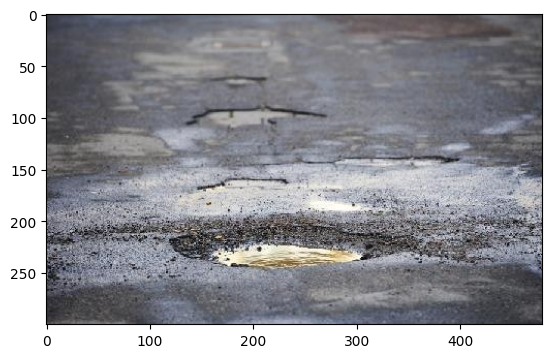

In [11]:
img=imread('/content/drive/MyDrive/pothole_dataset/images/train/img-332_jpg.rf.edbf67c28f12aff498f83cff3736dd97.jpg')
plt.imshow(img)

**Training the model using Data**

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/pothole_dataset/dataset_pothole.yaml batch=8 epochs=10 project=/content/drive/MyDrive/pothole_dataset/training_results name=pothole

100% 6.23M/6.23M [00:00<00:00, 117MB/s]
Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/pothole_dataset/dataset_pothole.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/pothole_dataset/training_results, name=pothole, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=No

**Prediction using Test Images**

In [ ]:
!yolo task=detect  mode=predict  model=/content/drive/MyDrive/pothole_dataset/training_results/pothole/weights/best.pt   conf=0.55  source=/content/drive/MyDrive/pothole_dataset/images/test

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/118 /content/drive/MyDrive/pothole_dataset/images/test/G0010124.JPG: 480x640 (no detections), 60.3ms
image 2/118 /content/drive/MyDrive/pothole_dataset/images/test/G0010760.JPG: 480x640 (no detections), 19.2ms
image 3/118 /content/drive/MyDrive/pothole_dataset/images/test/G0010770.JPG: 480x640 1 pothole, 19.6ms
image 4/118 /content/drive/MyDrive/pothole_dataset/images/test/G0011427.JPG: 480x640 (no detections), 8.9ms
image 5/118 /content/drive/MyDrive/pothole_dataset/images/test/G0011555.JPG: 480x640 (no detections), 12.1ms
image 6/118 /content/drive/MyDrive/pothole_dataset/images/test/G0011563.JPG: 480x640 (no detections), 9.2ms
image 7/118 /content/drive/MyDrive/pothole_dataset/images/test/G0011613.JPG: 480x640 (no detections), 12.2ms
image 8/118 /content/drive/MyDrive/pothole_dataset/images/test/G0011621.JPG: 48

In [ ]:
!cp -r /content/runs/detect/predict /content/drive/MyDrive/pothole_dataset/output

**Prediction using Test Videos**

In [ ]:
!yolo task=detect  mode=predict  model=/content/drive/MyDrive/pothole_dataset/training_results/pothole/weights/best.pt   conf=0.55  source=/content/drive/MyDrive/pothole_dataset/test_videos

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

video 1/2 (frame 1/178) /content/drive/MyDrive/pothole_dataset/test_videos/potholes.mp4: 384x640 1 pothole, 89.8ms
video 1/2 (frame 2/178) /content/drive/MyDrive/pothole_dataset/test_videos/potholes.mp4: 384x640 1 pothole, 7.7ms
video 1/2 (frame 3/178) /content/drive/MyDrive/pothole_dataset/test_videos/potholes.mp4: 384x640 1 pothole, 8.7ms
video 1/2 (frame 4/178) /content/drive/MyDrive/pothole_dataset/test_videos/potholes.mp4: 384x640 1 pothole, 7.3ms
video 1/2 (frame 5/178) /content/drive/MyDrive/pothole_dataset/test_videos/potholes.mp4: 384x640 1 pothole, 9.2ms
video 1/2 (frame 6/178) /content/drive/MyDrive/pothole_dataset/test_videos/potholes.mp4: 384x640 1 pothole, 7.9ms
video 1/2 (frame 7/178) /content/drive/MyDrive/pothole_dataset/test_videos/potholes.mp4: 384x640 2 potholes, 6.8ms
video 1/2 (frame 8/178) /content/d

In [ ]:
!cp -r /content/runs/detect/predict2 /content/drive/MyDrive/pothole_dataset/videos